# Project: Investigate no show appointments dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

A person makes a doctor appointment, receives all the instructions and no-show. Who to blame?



In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [67]:
# Load data and print out a few lines. Perform operations to inspect data
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
#   types and look for instances of missing or possibly errant data.
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [68]:
#brief data of the dataset
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [69]:
#check null values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [70]:
#summarize statistics of data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000




### Data Cleaning
minimum age has a nigative value

In [71]:
#get row of the negative value
df[df['Age']< 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [72]:
# Drop negative value
df.drop(df[df['Age'] < 0].index, inplace =True)

In [73]:
#convert datatypes of timedates from objects to datetime 
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  float64            
 1   AppointmentID   110526 non-null  int64              
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   Scholarship     110526 non-null  int64              
 8   Hipertension    110526 non-null  int64              
 9   Diabetes        110526 non-null  int64              
 10  Alcoholism      110526 non-null  int64              
 11  Handcap         110526 non-null  int64              
 12  SMS_received    110526 non-null  int64              
 13  No-show       

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (is it relationship between age and showing up)

In [74]:
#to not get confused of no show column attributes
replacement = { 'No': 'Showed', 
              'Yes': 'not showed'}
df['No-show'].replace(replacement, inplace = True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Showed
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,Showed
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,Showed
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Showed
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,Showed


In [75]:
# create mask 
showed = df['No-show'] == 'Showed'
not_showed = df['No-show'] == 'not showed'

is there any relation between the age and the shown up attribute ?

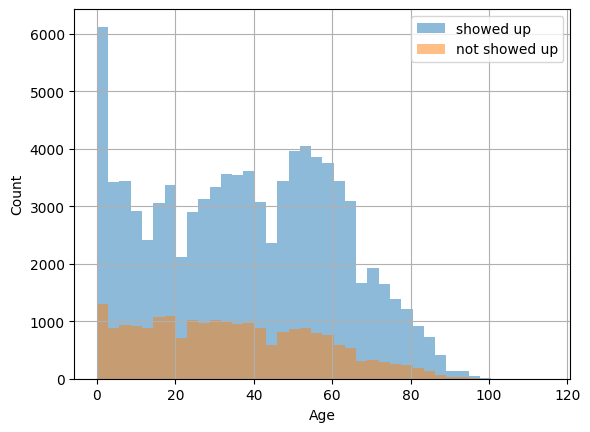

In [76]:

df.Age[showed].hist(label = 'showed up', alpha = 0.5, bins = 40)
df.Age[not_showed].hist(label = 'not showed up', alpha = 0.5, bins =40)
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend();

We cant decide if there is relationship or not from this plot so we can do another

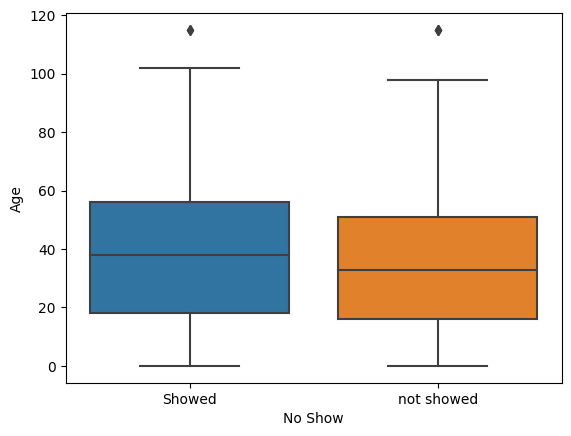

In [77]:
sns.boxplot(x ='No-show', y= 'Age', data =df);
plt.xlabel('No Show')
plt.ylabel('Age');

In [78]:
df.groupby('No-show')['Age'].mean()

No-show
Showed        37.790504
not showed    34.317667
Name: Age, dtype: float64

Its cleaer to say that younger people has more possiblity to not show at appointment than older people 

### Research Question 2  (relationship between gender and no show to appointment )

In [79]:
#replace label, just for make it clear
replacement_gender = { 'F': 'Female', 
                       'M': 'Male'}
df['Gender'].replace(replacement_gender, inplace = True)


In [80]:
# total pateints
df['No-show'].value_counts()


Showed        88207
not showed    22319
Name: No-show, dtype: int64

In [81]:
#create gender dataframe with propotion 
df_gender=pd.crosstab(index=df['Gender'],columns=df['No-show'],normalize='index')


is gender affect on the showing up of patient ?


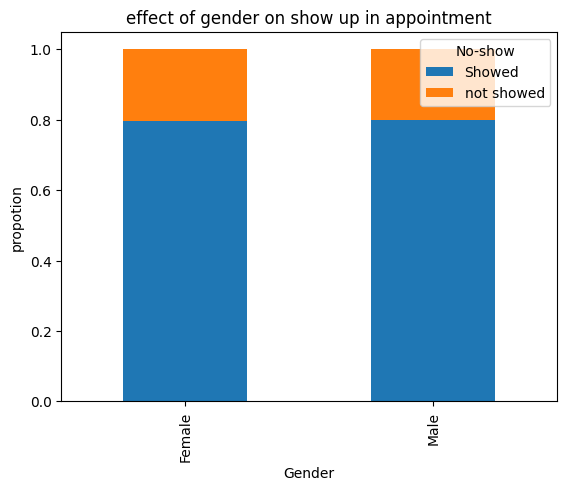

In [86]:
# plotting
def gender_plot():
    
    df_gender.plot(kind='bar',stacked = True)
    plt.xlabel('Gender')
    plt.ylabel('propotion')
    plt.title('effect of gender on show up in appointment');

gender_plot()

as shown in the previous plot the percentages of the absent of patient are almost qual in both gender 
that means it has no effect on the result

<a id='conclusions'></a>
## Conclusions

After doing some basic analysis on the dataset I found the following:

> **Limitation**: One serious limitation was the negative values of age , so to work around this limitation we dropped these values so that we get real insights on the average age.
other one is that the data is not equally splited ,the shown up is 4x number of nun shown so we add propotion to equal the values

>**1**: the average age of the patient who show up to their appointment is 37.8 and average patient who didn't shown up is 34.3

>**2**: the gender is not an effective attribute on showning up or not both gender have same percentage of non showing up